Plot for timestep

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
def extract_data_from_log(file_path):
    n_atoms = []
    time_per_md_step = []
    with open(file_path, 'r') as file:
        for line in file:
            # Match the pattern for System_size[atom] and MD_step/[s]
            match = re.match(r"!!! System_size\[atom\]: (\d+) .* MD_step/\[s\]: ([\d.]+)", line)
            if match:
                n_atoms.append(int(match.group(1)))  # Extract number of atoms
                md_steps_per_second = float(match.group(2))  # Extract MD steps per second
                time_per_md_step.append(1 / md_steps_per_second)  # Inverse to get time per MD step
    return np.array(n_atoms), np.array(time_per_md_step)

### cutoff_5.5

In [ ]:
# File path
file_1 = './timing-sr_torchscript_T0.log'
file_2 = './timing-lr_torchscript.log'
file_3 = './timing-lr_torchscript_old_T0.log'

# Extract data

omp2_n_atoms_1, omp2_time_per_md_step_1 = extract_data_from_log(file_1)
omp2_n_atoms_2, omp2_time_per_md_step_2 = extract_data_from_log(file_2)
omp2_n_atoms_3, omp2_time_per_md_step_3 = extract_data_from_log(file_3)


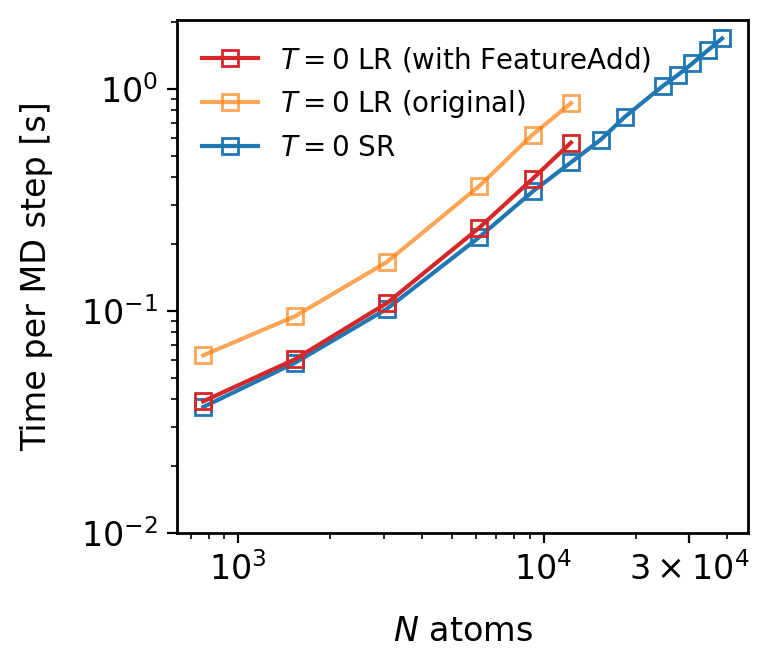

In [7]:
plt.figure(figsize=(4, 3.5),dpi=200)

plt.rcParams.update({
    "font.size": 12,             # Font size
    "axes.linewidth": 1.0,       # Axis line width
    "lines.linewidth": 1.5,      # Line width
    "lines.markersize": 6,       # Marker size
    "xtick.major.width": 0.8,    # Major tick width
    "ytick.major.width": 0.8,    # Major tick width
})

# Plot data
line1 = plt.loglog(omp2_n_atoms_1, omp2_time_per_md_step_1, 's-', color='tab:blue', label="$T=0$ SR", mfc='none')[0]
line2 = plt.loglog(omp2_n_atoms_2, omp2_time_per_md_step_2, 's-', color='tab:red', label="$T=0$ LR (with FeatureAdd)", mfc='none')[0]
line3 = plt.loglog(omp2_n_atoms_3, omp2_time_per_md_step_3, 's-', color='tab:orange', label="$T=0$ LR (original)", mfc='none', alpha=0.7)[0]


plt.xlabel(r'$N$ atoms', fontsize=12, labelpad=10)
plt.ylabel(r'Time per MD step [s]', fontsize=12, labelpad=10)
plt.legend(fontsize=10, loc="upper left", frameon=False,
           handles=[line2, line3, line1],)

# Adjust axis ticks
plt.xticks([1e3, 1e4, 3e4], [r"$10^3$", r"$10^4$", r"$3\times10^4$"])
plt.yticks([1e-2, 1e-1, 1e0], [r"$10^{-2}$" ,r"$10^{-1}$", r"$10^{0}$"])

plt.tight_layout()
# plt.savefig('../figure/timing_torch.pdf', dpi=300, bbox_inches='tight', format='pdf')

# plt.show()